In [ ]:
# Nate Brunacini, nbrunaci@u.rochester.edu
# Supervisor: Kelly A. Douglass
# This file runs the findMetallicities_Pilyugin function from findmetallicities_Pilyugin over all galaxies in the MaNGA 
# dataset and writes the results to a FITS file.

In [1]:
from findmetallicities_Pilyugin_DR17_v1 import *
import time
from astropy.table import Table
import os
from astropy.io import fits

/home/nbrunaci/.local/lib/python3.8/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [5]:
# Calling the functions

# Obtaining redshift data from drpall fits file
with fits.open('drpall-v3_1_1.fits', memmap=True) as drpall:
    data = drpall[1].data
    
    exceptions = 0# Number of galaxies for which data could not be retrieved
    start = time.time()
    for index in range(0,1):#range(0,len(data['plateifu'])):# Use this to iterate over every galaxy
        try:#for i in range(0,1):#
            trialstart = time.time()# Time at which the current trial starts
            # Calculating metallicities
#             plateifu = data['plateifu'][index]
#             objmaps = addDiagnostics_Pilyugin(plateifu)
#             results = findMetallicities_Pilyugin(objmaps)
            plateifu = data['plateifu'][index]
            results = calcMetallicities(plateifu)
            
            # Preparing layers of data values
            header = fits.PrimaryHDU([])
            R_hdu = fits.ImageHDU(results['R']['metallicity'].data, name='R_metallicity')
            R_ivar_hdu = fits.ImageHDU([])#fits.ImageHDU(results['R']['ivar'].data, name='R_ivar')# Left blank as ivar methods are not yet implemented
            
            # Preparing layers of mask values; ImageHDU apparently cannot be used for boolean values, so mask values are 
            # converted to integers here
            R_m_hdu = fits.ImageHDU(results['R']['metallicity'].mask.astype('int32'), name='R_mask')
            
            # Saving data and mask layers to FITS file
            hdul = fits.HDUList([header, R_hdu, R_ivar_hdu, R_m_hdu])
            filename = 'Pilyugin_'+plateifu+'_DR17_v1.fits'#'MetallicityFITS_Pilyugin/Pilyugin_'+plateifu+'.fits'
            # Removing existing file to allow new one to be saved
            if os.path.exists(filename):
                os.remove(filename)
            hdul.writeto(filename)
            
#             # Saving metallicity maps (Not really necessary, as maps can be created from the data in the FITS files)
#             plt.imshow(results['R']['metallicity'])
#             plt.colorbar()
#             plt.savefig('R_metallicity_maps/' + plateifu + '_Rmetallicity.png')
#             plt.close()
            
            print('Finished galaxy',index,'of',len(data),'(plateifu',plateifu + ') in',time.time()-trialstart,'seconds',flush=True)
            
        except Exception:
            exceptions += 1
            print(index,flush=True)
    end = time.time()
    print('\nNumber of galaxies for which data could not be retrieved: ' + str(exceptions),flush=True)
    print('Elapsed time:',str(end - start),'seconds',flush=True)

Finished galaxy 0 of 11273 (plateifu 10001-12701) in 19.266086101531982 seconds

Number of galaxies for which data could not be retrieved: 0
Elapsed time: 19.271181344985962 seconds


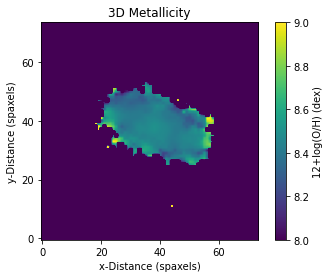

In [6]:
with fits.open('Pilyugin_10001-12701_DR17_v1.fits', mode='update') as hdul:
    plt.imshow(hdul[1].data,vmin=8,vmax=9)
    plt.gca().invert_yaxis()
    plt.locator_params(axis='y', nbins=5)
    plt.title('3D Metallicity')
    plt.xlabel('x-Distance (spaxels)')
    plt.ylabel('y-Distance (spaxels)')
    plt.colorbar(label='12+log(O/H) (dex)')

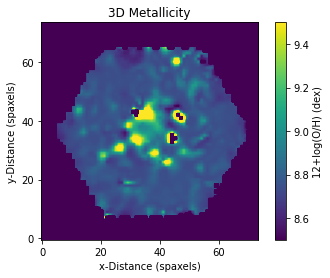

In [10]:
with fits.open('../Research_Summer2021/MetallicityFITS_Pilyugin/Pilyugin_9487-12701.fits', mode='update') as hdul:
    plt.imshow(hdul[1].data,vmin=8.5,vmax=9.5)
    plt.gca().invert_yaxis()
    plt.locator_params(axis='y', nbins=5)
    plt.title('3D Metallicity')
    plt.xlabel('x-Distance (spaxels)')
    plt.ylabel('y-Distance (spaxels)')
    plt.colorbar(label='12+log(O/H) (dex)')